<a href="https://colab.research.google.com/github/ubhyl-debug/ml12/blob/main/01_Exercise_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Transformer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The most important part of the transformer is the Self-Attention mechanism.
For possible exam exercises you should be able to calculate the self-attention between multiple vectors.

A possible exercise could have multiple "difficulties".


*   Self-Attention completely seperate from transformer
*   Scaled KQV-Self Attention
*   Multihead-Scaled-KQV-Self-Attention

We'll probably never ask about Multihead attention so lets create an exercise for Scaled-KQV-Self-Attention


## Reminder Formulas:
###Self-Attention

$w'_{ij} = x_i \cdot x^T_j$

$w_{ij} =$ softmax over all calculated $w'_{ij}$ → $w_{ij} = \frac{e^{w'_{ij}}}{\sum_j e^{w'_{ij}}}$

$y_i = \sum_j w_{ij} x_j$

###Scaled-KQV-Self-Attention

Generate $k_i$, $q_i$ and $v_i$ with three fully connected layers for all inputs $x_i$.

Scale dot product with number of elements in input vectors.

$w'_{ij} = \frac{q_i \cdot k^T_j}{\sqrt{d}}$

$w_{ij} = \frac{e^{w'_{ij}}}{\sum_j e^{w'_{ij}}}$

$y_i = \sum_j w_{ij} v_j$

### Exercise: Calculate for each input vector its self attention feature with Scaled-Dot-Product-KQV-Self-attention

In the exam we could theoretically give you multiple input vectors $x_i$ and 3 fully connected layers. Then you should be able to calculate  and $k_i$, $q_i$ and $v_i$ for each input vector with the normal forward pass of a perceptron.

But most likely we'll just give you $k$, $q$, and $v$, for each input vector.

Let's say we have three input vectors

#### KQV for input vector $x_1$

$ k_1 = \left[ \begin{array}{r} 2 & 1 & 3 & 4 \end{array}\right]$  
$ q_1 = \left[ \begin{array}{r} 5 & 2 & 5 & -2\end{array}\right]$  
$ v_1 = \left[ \begin{array}{r} 6 & 0 & 1 & 0 \end{array}\right]$  

#### KQV for input vector $x_2$
$ k_2 = \left[ \begin{array}{r} 7 & 2 & -3 & -1 \end{array}\right]$  
$ q_2 = \left[ \begin{array}{r} -1 & -5 & -2 & 3\end{array}\right]$  
$ v_2 = \left[ \begin{array}{r} -2 & -1 & 2 & 0\end{array}\right]$  

#### KQV for input vector $x_3$
$ k_3 = \left[ \begin{array}{r} 4 & -2 & 1 & 0\end{array}\right]$  
$ q_3 = \left[ \begin{array}{r} 7 & 2 & 4 & 0\end{array}\right]$  
$ v_3 = \left[ \begin{array}{r} -3 & 5& 2 & 0\end{array}\right]$


In this exercise we will calculate $y_1$, $y_2$ and $y_3$

In an exam we would probably only ask you to calculate one of these three attention features

## Attention feature of $x_1$

Each vector has dimension 4 so we scale with $\sqrt{4} =2$

### Relvant formula: $w'_{ij} = \frac{q_i \cdot k^T_j}{\sqrt{d}}$
<br/><br/>


$w'_{11} = \frac{q_1 \cdot k^T_1}{\sqrt{4}} = \frac{\left[ \begin{array}{rrr} 5 & 2 & 5 & -2 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 2 \\ 1 \\ 3 \\ 4 \end{array}\right] }{\sqrt{4}} = \frac{5*2+2*1+5*3-2*4}{\sqrt{4}} = \frac{19}{2} = 9.5$

$w'_{12} = \frac{q_1 \cdot k_2^T}{\sqrt{4}} = \frac{\left[ \begin{array}{rrr} 5 & 2 & 5 & -2 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 7 \\ 2 \\ -3 \\ -1 \\ \end{array}\right] }{\sqrt{4}} = \frac{5*7+2*2-5*3 +2*1}{\sqrt{4}} = \frac{26}{2} = 13$

$w'_{13} = \frac{q_1 \cdot k_3^T}{\sqrt{4}} = \frac{\left[ \begin{array}{rrr} 5 & 2 & 5 &-2 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 4 \\ -2 \\ 1 \\ 0 \end{array}\right] }{\sqrt{4}} = \frac{5*4-2*2+5*1-2*0}{\sqrt{4}} = \frac{21}{2} = 10.5$
<br/><br/>

### Relvant formula: $w_{ij} = \frac{e^{w'_{ij}}}{\sum_j e^{w'_{ij}}}$


Now lets calculate the softmax for each scaled dot product

$w_{11} = \frac{e^{9.5}} {e^{9.5}+e^{13} + e^{10.5}} = 0.03$

$w_{12} = \frac{e^{13}} {e^{9.5}+e^{13} + e^{10.5}} = 0.90$

$w_{13} = \frac{e^{10.5}} {e^{9.5}+e^{13} + e^{10.5}} = 0.07$

These are the three attention values. You can interpret them as follows:

For vector $x_1$, $x_1$ is 3% relevant, vector $x_2$ is 90% relevant and vector $x_3$ is 7% relevant
<br/><br/>

### Relvant formula: $y_i = \sum_j w_{ij} v_j$

Let's use these weights to calculate our final attention feature vector $y_1$

$y_1 = 0.03 * \left[ \begin{array}{r} 6 & 0 & 1 & 0 \end{array}\right] + 0.90* \left[ \begin{array}{r} -2 & -1 & 2 & 0 \end{array}\right] + 0.07* \left[ \begin{array}{r} -3 & 5 & 2 & 0 \end{array}\right] $

$y_1= \left[ \begin{array}{r} 0.18 & 0 & 0.03 &0 \end{array}\right] + \left[ \begin{array}{r} -1.8 & -0.9 & 1.8 & 0 \end{array}\right] + \left[ \begin{array}{r} -0.21 & 0.35& 0.14 & 0\end{array}\right]$

$y_1 = \left[ \begin{array}{r} -1.83 & -0.55 & 1.97 & 0\end{array}\right]$


## Attention feature of $x_2$

$w'_{21} = \frac{q_2 \cdot k^T_1}{\sqrt{4}} = \frac{\left[ \begin{array}{rrr} -1 & -5 & -2 & 3 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 2 \\ 1 \\ 3 \\ 4 \end{array}\right] }{\sqrt{4}} = \frac{-1*2-5*1-2*3+3*4}{\sqrt{4}} = \frac{-1}{2} = -0.5$

$w'_{22} = \frac{q_2 \cdot k^T_2}{\sqrt{4}} = \frac{\left[ \begin{array}{rrr} -1 & -5 & -2 & 3 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 7 \\ 2 \\ -3 \\ -1 \end{array}\right] }{\sqrt{4}} = \frac{-1*7-5*2+2*3-3*1}{\sqrt{4}} = \frac{-14}{2} = -7$

$w'_{23} = \frac{q_2 \cdot k^T_3}{\sqrt{4}} = \frac{\left[ \begin{array}{rrr} -1 & -5 & -2 & 3\end{array}\right] \ \cdot \ \left[ \begin{array}{r} 4 \\ -2 \\ 1 \\ 0 \end{array}\right] }{\sqrt{4}} = \frac{-1*4+5*2-2*1+3*0}{\sqrt{4}} = \frac{4}{2} = 2$


### softmax

$w_{21} = \frac{e^{-0.5}} {e^{-0.5}+e^{-7} + e^{2}} = 0.08$

$w_{22} = \frac{e^{-7}} {e^{-0.5}+e^{-7} + e^{2}} = 0.00$

$w_{23} = \frac{e^{2}} {e^{-0.5}+e^{-7} + e^{2}} = 0.92$


### attention feature

$y_2 = 0.08 * \left[ \begin{array}{r} 6 & 0 & 1 & 0 \end{array}\right] + 0.00* \left[ \begin{array}{r} -2 & -1 & 2 & 0 \end{array}\right] + 0.92* \left[ \begin{array}{r} -3 & 5 & 2 & 0 \end{array}\right] $

$y_2 = \left[ \begin{array}{r} -2.28 & 4.6 & 1.92 & 0 \end{array}\right] $


## Attention feature of $x_3$

$w'_{31} = \frac{q_3 \cdot k^T_1}{\sqrt{4}} = \frac{\left[ \begin{array}{rrr} 7 & 2 & 4 & 0\end{array}\right] \ \cdot \ \left[ \begin{array}{r} 2 \\ 1 \\ 3 \\ 4 \end{array}\right] }{\sqrt{4}} = \frac{7*2+2*1+4*3+4*0}{\sqrt{4}} = \frac{28}{2} = 14$

$w'_{32} = \frac{q_3 \cdot k^T_2}{\sqrt{4}} = \frac{\left[ \begin{array}{rrr} 7 & 2 & 4 &0 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 7 \\ 2 \\ -3 \\ -1\end{array}\right] }{\sqrt{4}} = \frac{7*7+2*2-4*3-0*1}{\sqrt{4}} = \frac{41}{2} = 20.5$

$w'_{33} = \frac{q_3 \cdot k^T_3}{\sqrt{4}} = \frac{\left[ \begin{array}{rrr} 7 & 2 & 4 &0 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 4 \\ -2 \\ 1 \\ 0 \end{array}\right] }{\sqrt{4}} = \frac{7*4-2*2+4*1+0}{\sqrt{4}} = \frac{28}{2} = 14$


### softmax

$w_{31} = \frac{e^{14}} {e^{14}+e^{20.5} + e^{14}} = 0.00$

$w_{32} = \frac{e^{20.5}} {e^{14}+e^{20.5} + e^{14}} = 1.00$

$w_{33} = \frac{e^{14}} {e^{14}+e^{20.5} + e^{14}} = 0.00$

for the third input vector, only the second input vector is relevant and it just returns $v_2$

### attention feature

$y_3 = 0.00 * \left[ \begin{array}{r} 6 & 0 & 1 &0 \end{array}\right] + 1.00* \left[ \begin{array}{r} -2 & -1 & 2 & 0 \end{array}\right] + 0.00* \left[ \begin{array}{r} -3 & 5 & 2 &0 \end{array}\right] $

$y_3 = \left[ \begin{array}{r} -2 & -1 & 2 & 0 \end{array}\right] $


So our Self-Attention calculated the following three vectors

$
\left[ \begin{array}{r} -1.83 & -0.315 & 1.97 & 0\end{array}\right]
\left[ \begin{array}{r} -2.28 & 4.6 & 1.92 & 0 \end{array}\right]
 \left[ \begin{array}{r} -2 & -1 & 2 & 0 \end{array}\right]
$



# Multihead attention

Same as above but with 2 heads and $W_O$ = $\left[ \begin{array}{c} 1 & 2 & 3 &0  \\ 2 & -1 &0 &0 \\ 0 & 0 & 0 & 0\\ 1& 1 & 1 & 1 \end{array}\right]$ and Bias  $b_O = \left[ \begin{array}{c} 1 & -1 & 0 & 0 \end{array}\right]$

Let's calculate $y_1$

Reminder:

$ q_1 = \left[ \begin{array}{c} 5 & 2 & 5 & -2\end{array}\right]$  
$ k_1 = \left[ \begin{array}{c} 2 & 1 & 3 & 4 \end{array}\right]$  
$ k_2 = \left[ \begin{array}{c} 7 & 2 & -3 & -1 \end{array}\right]$  
$ k_3 = \left[ \begin{array}{c} 4 & -2 & 1 & 0\end{array}\right]$  
$ v_1 = \left[ \begin{array}{c} 6 & 0 & 1 & 0 \end{array}\right]$  
$ v_2 = \left[ \begin{array}{r} -2 & -1 & 2 & 0\end{array}\right]$  
$ v_3 = \left[ \begin{array}{r} -3 & 5& 2 & 0\end{array}\right]$  


For two heads, we split each vector into two parts.

$ q_{11} = \left[ \begin{array}{c} 5 & 2 \end{array}\right] q_{12} = \left[ \begin{array}{c} 5 & -2\end{array}\right]$  
$ k_{11} = \left[ \begin{array}{c} 2 & 1\end{array}\right] k_{12} = \left[ \begin{array}{c} 3 & 4 \end{array}\right]$  
$ k_{21} = \left[ \begin{array}{c} 7 & 2 \end{array}\right] k_{22} = \left[ \begin{array}{c} -3 & -1 \end{array}\right]$  
$ k_{31} = \left[ \begin{array}{c} 4 & -2\end{array}\right] k_{32} = \left[ \begin{array}{c} 1 & 0\end{array}\right]$  
$ v_{11} = \left[ \begin{array}{c} 6 & 0\end{array}\right] v_{12} =  \left[ \begin{array}{c} 1 & 0 \end{array}\right]$  
$ v_{21} = \left[ \begin{array}{r} -2 & -1\end{array}\right] v_{22} = \left[ \begin{array}{r} 2 & 0\end{array}\right]$  
$ v_{31} = \left[ \begin{array}{r} -3 & 5\end{array}\right] v_{32} = \left[ \begin{array}{r} 2 & 0\end{array}\right]$  


# We are now doing atttention for each head seperately:
## Head 1

$w'_{111} = \frac{q_{11} \cdot k^T_{11}}{\sqrt{2}} = \frac{\left[ \begin{array}{rrr} 5 & 2 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 2 \\ 1 \end{array}\right] }{\sqrt{2}} = \frac{12}{\sqrt{2}} = 8.49$

$w'_{121} = \frac{q_{11} \cdot k_{21}^T}{\sqrt{2}} = \frac{\left[ \begin{array}{rrr} 5 & 2\end{array}\right] \ \cdot \ \left[ \begin{array}{r} 7 \\ 2 \end{array}\right] }{\sqrt{2}} = \frac{39}{\sqrt{2}} = 27.58$

$w'_{131} = \frac{q_{11} \cdot k_{31}^T}{\sqrt{2}} = \frac{\left[ \begin{array}{rrr} 5 & 2\end{array}\right] \ \cdot \ \left[ \begin{array}{r} 4 \\ -2 \end{array}\right] }{\sqrt{2}} = \frac{16}{\sqrt{2}} = 11.31$
<br/><br/>

### Softmax

$w_{111} = \frac{e^{8.49}} {e^{8.49}+e^{27.58} + e^{11.31}} = 0.00$

$w_{121} = \frac{e^{27.58}} {e^{8.49}+e^{27.58} + e^{11.31}} = 1.00$

$w_{131} = \frac{e^{11.31}} {e^{8.49}+e^{27.58} + e^{11.31}} = 0.00$

### Weighted sum

$y_{11} = 0.00 * \left[ \begin{array}{r} 6 & 0 \end{array}\right] + 1* \left[ \begin{array}{r} -2 & -1\end{array}\right] + 0.00* \left[ \begin{array}{r} -3 & 5 \end{array}\right]$

$y_{11}= \left[ \begin{array}{r} -2 & -1\end{array}\right]$


## Head 2

$w'_{112} = \frac{q_{12} \cdot k^T_{12}}{\sqrt{2}} = \frac{\left[ \begin{array}{rrr} 5 & -2 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 3 \\ 4 \end{array}\right] }{\sqrt{2}} = \frac{7}{\sqrt{2}} = 4.95$

$w'_{122} = \frac{q_{12} \cdot k_{22}^T}{\sqrt{2}} = \frac{\left[ \begin{array}{rrr} 5 & -2\end{array}\right] \ \cdot \ \left[ \begin{array}{r} -3 \\ -1 \end{array}\right] }{\sqrt{2}} = \frac{-13}{\sqrt{2}} = -9.19$

$w'_{132} = \frac{q_{12} \cdot k_{32}^T}{\sqrt{2}} = \frac{\left[ \begin{array}{rrr} 5 & -2\end{array}\right] \ \cdot \ \left[ \begin{array}{r} 1 \\ 0 \end{array}\right] }{\sqrt{2}} = \frac{5}{\sqrt{2}} = 3.54$
<br/><br/>

### Softmax

$w_{112} = \frac{e^{4.95}} {e^{4.95}+e^{-9.19} + e^{3.54}} = 0.80$

$w_{122} = \frac{e^{-9.19}} {e^{4.95}+e^{-9.19} + e^{3.54}} = 0.00$

$w_{132} = \frac{e^{3.54}} {e^{4.95}+e^{-9.19} + e^{3.54}}= 0.20$

Heads can attend to different input vectors
First head only attended to $x_2$
Second head attends to $x_1$ and $x_3$

### Weighted sum

$y_{12} = 0.80 * \left[ \begin{array}{r} 1 & 0 \end{array}\right] + 0.00* \left[ \begin{array}{r} 2 & 0\end{array}\right] + 0.20* \left[ \begin{array}{r} 2 & 0 \end{array}\right]$

$y_{12}= \left[ \begin{array}{r} 1.2 & 0\end{array}\right]$


## Merging heads
Concatenate the two ouptut vectors of the heads

$y_{1C} = \left[ \begin{array}{r} -2 & -1 & 1.2  & 0\end{array}\right]$

Aggregate information of heads with output fully connected layer

$y_{1} = y_1 W_O^T +b_O $

$y_{1} = \left[ \begin{array}{r} -2 & -1 & 1.2  & 0\end{array}\right] \left[ \begin{array}{c} 1 & 2 & 0 &1  \\ 2 & -1 &0 &1 \\ 3 & 0 & 0 & 1\\ 0& 0 & 0 & 1 \end{array}\right] + \left[ \begin{array}{c} 1 & -1 & 0 & 0 \end{array}\right]$  
$y_{1} = \left[ \begin{array}{c} 0.6 & -4 & 0 & -1.8 \end{array}\right]$

# You should be able to calculate this in the exam.  
  
    
### Not covered in this exercise but you should also be able to calculate the parameters in a transformer given number transformer blocks, dimension $d$, vocabulary size and context size (as done in lecture).

### It's also a possibility to additionally get a dataset size and then you are tasked to calculate needed FLOPs of the training. Then you could receive a Scaling Law function $N_{opt} = ...C^{...}$ and and you should be able to calculate the optimal model size.




## How is Multihead Attention implemented in Python?

![](https://gitlab.kit.edu/nikolai.polley/Ml-Images/-/raw/main/mha.png)

In [ ]:
# timm --> pyTorch IMage Models contains multiple different vision transformer
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
import torch
import torch.nn as nn


class Attention(nn.Module):
    """Attention mechanism.
    Parameters
    ----------
    dim : int
        Input and output dimension of each input vector.
    n_heads : int
        Number of attention heads.

    Attributes
    ----------
    scale : float
        Normalizing constant for the dot product.
    qkv : nn.Linear
        Linear projection for the query, key and value.
    proj : nn.Linear
        Linear mapping that takes in the concatenated output of all attention
        heads and maps it into a new space.
    """
    def __init__(self, dim, n_heads=12, masked_attention=False, context_size=None):
        super().__init__()
        self.n_heads = n_heads
        self.dim = dim
        self.head_dim = dim // n_heads
        self.scale = self.head_dim ** -0.5

        self.qkv = nn.Linear(dim, dim * 3)

        #  We create a linear layer that takes a vector which contains
        #  d input elements and create a resulting vector with size d*3
        #  in which we store k, q and v.

        #  This is identical to:
        #  k = nn.Linear(dim, dim)
        #  q = nn.Linear(dim, dim)
        #  v = nn.Linear(dim, dim)
        #  self.qkv = torch.cat(q,k,v dim=-1)


        # last output layer to aggregate the information of the merged heads
        self.proj = nn.Linear(dim, dim)

        # for masked/causal attention
        self.masked_attention = masked_attention
        if masked_attention:
            self.mask = torch.tril(torch.ones(context_size, context_size)).view(1, 1, context_size, context_size).cuda()
            # sets 1 if attention is allowed, 0 otherwise.
            # 10000
            # 11000
            # 11100
            # 11110
            # 11111


    def forward(self, x):
        """Run forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, number of input vectors, dim)`.
        Returns
        -------
        torch.Tensor
            Shape `(batchsize, number of input vectors, dim)`.
        """
        batchsize, n_input_vectors, dim = x.shape

        # if linear layer receives input with three dimension, its weight matrix
        # is duplicated for each vector
        qkv = self.qkv(x)  # output has dimension (batchsize, number input vectors, 3 * dim)


        # qkv calculates for all input vectors their key query and value vectors
        # We need to "cut out" the queries, keys and values
        # Simultaneously we also "cut out" the heads for multihead attention
        qkv = qkv.reshape(
                batchsize, n_input_vectors, 3, self.n_heads, self.head_dim
        )  # (batchsize, number input vectors, 3, n_heads, head_dim)


        # Later we will do matrix multiplication with 4D-tensors
        # We intentionally skipped this part in lecture but we need to
        # change the order of the dimensions so we can calculate the dot product
        # of all heads at the same time
        qkv = qkv.permute(
                2, 0, 3, 1, 4
        )  # (3, batchsize, n_heads, number input vectors, head_dim)


        # q contains the queries of all heads of all input vectors
        # same for k and v

        q, k, v = qkv[0], qkv[1], qkv[2]

        # transpose the last two dimension of keys
        k_t = k.transpose(-2, -1)  # (batchsize, n_heads, head_dim, number input vectors)


        # @ is the symbol for matrix multiplication
        # if you want to know how 4d matmul works: https://pytorch.org/docs/stable/generated/torch.matmul.html#torch.matmul
        # self.scale = 1 / root(head_dim)
        s_dot_product = (q @ k_t) * self.scale # (batchsize, n_heads, number input vectors, number input vectors)


        # Only used in Decoders that use masked attention, This sets all values to -inf if i > j
        if self.masked_attention:
            s_dot_product = s_dot_product.masked_fill(self.mask[:,:,:n_input_vectors, :n_input_vectors]== 0, float('-inf'))


        attn = s_dot_product.softmax(dim=-1)  # (batchsize, n_heads, number input vectors, number input vectors)

        weighted_avg = attn @ v  # (batchsize, n_heads, number input vectors, head_dim)


        # reverse order of number input vectors and n_heads ()
        weighted_avg = weighted_avg.transpose(
                1, 2
        )  # (batchsize, number input vectors, n_heads, head_dim)

        # Merge the heads back into one input vector
        weighted_avg = weighted_avg.flatten(2)  # (batchsize, number input vectors, dim)


        # Final output layer to aggreagte information of heads
        x = self.proj(weighted_avg)  # (batchsize, number input vectors, dim)

        return x

## create 10 input vectors each with size 800.
dummy_input = torch.rand(1,10, 800)

## create Multihead Attention Block
mha = Attention(dim=800, n_heads=8)

## feed dummy input through multihead attention
dummy_result = mha(dummy_input)
print(f"input shape was {dummy_input.shape}, output shape should be identical {dummy_result.shape}")

input shape was torch.Size([1, 10, 800]), output shape should be identical torch.Size([1, 10, 800])


Transformer decoder use masked atention. This sets "future vectors" to -inf so that they cannot look up the result during training

In [ ]:
# let's define a maximum of 5 input vectors
mask = torch.tril(torch.ones(5, 5)).view(1, 1, 5, 5)
print("mask \n",mask,"\n")

# lets take a random w' matrix in shape num_inputs*num_inputs

rand_weight_matrix = torch.rand(1,1,5,5)
#mask this matrix

masked_weight = rand_weight_matrix.masked_fill(mask[:,:,:5, :5]== 0, float('-inf'))
print("\n masked weight before softmax \n", masked_weight)

print("\n masked_weight after softmax \n", masked_weight.softmax(dim=-1))

mask 
 tensor([[[[1., 0., 0., 0., 0.],
          [1., 1., 0., 0., 0.],
          [1., 1., 1., 0., 0.],
          [1., 1., 1., 1., 0.],
          [1., 1., 1., 1., 1.]]]]) 


 masked weight before softmax 
 tensor([[[[0.1457,   -inf,   -inf,   -inf,   -inf],
          [0.2683, 0.6305,   -inf,   -inf,   -inf],
          [0.1966, 0.5824, 0.1189,   -inf,   -inf],
          [0.7410, 0.1218, 0.5823, 0.6931,   -inf],
          [0.3248, 0.3448, 0.0532, 0.7839, 0.2439]]]])

 masked_weight after softmax 
 tensor([[[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.4104, 0.5896, 0.0000, 0.0000, 0.0000],
          [0.2944, 0.4331, 0.2724, 0.0000, 0.0000],
          [0.2990, 0.1610, 0.2551, 0.2850, 0.0000],
          [0.1891, 0.1930, 0.1441, 0.2993, 0.1744]]]])


Implementation of Fully Connected Layer

![](https://gitlab.kit.edu/nikolai.polley/Ml-Images/-/raw/main/FC.png)

### We will use GELU instead of ReLU
![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/ReLU_and_GELU.svg/440px-ReLU_and_GELU.svg.png)

In [ ]:
class MLP(nn.Module):
    """Multilayer perceptron.

    Called Fully Connected Layers in lecture  (blue block inside the transformer block)

    Contains two fully connected layers.
        - the first fully connected layer quadruples vector size
        - the second fully connected layer decreases vector size back to original input size

    Parameters
    ----------
    dim : int
        Size of vectors.


    Attributes
    ----------
    fc : nn.Linear
        The First linear layer.
    act : nn.GELU
        GELU activation function.
    fc2 : nn.Linear
        The second linear layer.

    """
    def __init__(self, dim):
        super().__init__()
        self.fc1 = nn.Linear(in_features=dim, out_features=4*dim)
        self.act = nn.GELU()
        self.fc2 = nn.Linear(in_features=4*dim, out_features=dim)

    def forward(self, x):
        """Run forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, number input vectors, in_features)`.
        Returns
        -------
        torch.Tensor
            Shape `(batchsize, number input vectors, in_features)`
        """
        x = self.fc1(x)  # (batchsize, number input vectors, 4*dim)
        x = self.act(x)  # (batchsize, number input vectors, 4*dim)
        x = self.fc2(x)  # (batchsize, number input vectors, dim)
        return x

"""
Usually a FC layer takes a tensor with shape (batchsize, number inputs) as input
If a third dimension is provided, the same FC layer is used multiple time to all "last dimensionss"
"""

## create 10 input vectors each with size 800.
dummy_input = torch.rand(1,10, 800)

## create MLP Block
FC = MLP(dim=800)

## feed dummy input through fully connected layers
dummy_result = FC(dummy_input)
print(f"input shape was {dummy_input.shape}, output shape should be identical {dummy_result.shape}")

input shape was torch.Size([1, 10, 800]), output shape should be identical torch.Size([1, 10, 800])


A Transformer Block contains


*   Multihead attention
*   Two fully connected layer
*   Two normalization layer
*   Two skip connections



In [ ]:
class Block(nn.Module):
    """Transformer block.
    Parameters
    ----------
    dim : int
        Embedding dimension.
    n_heads : int
        Number of attention heads.

    Attributes
    ----------
    norm1, norm2 : LayerNorm
        Layer normalization.
    attn : Attention
        Attention module.
    mlp : MLP
        MLP module.
    """
    def __init__(self, dim, n_heads, is_decoder=False, context_size=None):
        super().__init__()
        ## Layer norm is (a-µ)/sigma
        ## it is possible that the standard deviation == 0 so we always add a tiny value (eps)
        self.norm1 = nn.LayerNorm(dim, eps=1e-6)

        # Multihead attention (can be masked if decoder)
        self.attn = Attention(
                dim,
                n_heads=n_heads,
                masked_attention = is_decoder,
                context_size=context_size
        )
        self.norm2 = nn.LayerNorm(dim, eps=1e-6)

        # the two fully connected layers
        self.mlp = MLP(
                dim=dim,
        )

    def forward(self, x):
        """Run forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, number input vectors, dim)`.
        Returns
        -------
        torch.Tensor
            Shape `(batchsize, number input vectors, dim)`.
        """

        # Two skip connections
        # We use pre-normalization here: Norrmalize input instead of output of MHA
        # instead of after the attention/mlp part
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))

        return x

## create 10 input vectors each with size 800.
dummy_input = torch.rand(1,10, 800)

## create transformer block
transformer_block_1 = Block(dim=800, n_heads=4)
## and lets create another transformer Block
transformer_block_2 = Block(dim=800, n_heads=8)

## feed dummy input through both stacked transformer blocks
dummy_result = transformer_block_2(transformer_block_1(dummy_input))

print(f"input shape was {dummy_input.shape}, output shape should be identical {dummy_result.shape}")

input shape was torch.Size([1, 10, 800]), output shape should be identical torch.Size([1, 10, 800])


![](https://gitlab.kit.edu/nikolai.polley/Ml-Images/-/raw/main/vit.png)

We have programmed a transformer block, the baseline for all Transformer architectures.

Now we will use this Code to build a Vision Transformer.
In the lecture it was said that we cut our image into patches and feed them as vectors into transfomer.
We use a convolutional layer with stride=kernel size to cut out our patches and the number of channels of this layer represents the size of our embedding vector.


In [ ]:
class PatchEmbed(nn.Module):
    """Split image into patches and then embed them.
    Parameters
    ----------
    patch_size : int
        Size of the patch (it is a square).
    embed_dim : int
        The emmbedding dimension. --> how many values should our input vector have
    Attributes
    ----------
    proj : nn.Conv2d
        Convolutional layer that does both the splitting into patches
        and their embedding.
    """
    def __init__(self, patch_size, embed_dim=768):
        super().__init__()
        self.patch_size = patch_size

        """
        Notice: Stride == kernel size
        This cuts out a patch and then uses the convolutional Layer to create a d-size vector
        """
        self.proj = nn.Conv2d(
                in_channels=3, # 3 input channels because image is RGB
                out_channels=embed_dim, # numbe of filters
                kernel_size=patch_size,
                stride=patch_size,
        )

    def forward(self, x):
        """Run forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, in_chans, img_size, img_size)`.
        Returns
        -------
        torch.Tensor
            Shape `(batchsize, n_patches, embed_dim)`.
        """
        x = self.proj(x)  # (batchsize, embed_dim, n_patches ** 0.5, n_patches ** 0.5)

        """
        # Last two dimensions say, the x and y position of the patch. We remove that to create a sequential list of vectors.
        """
        x = x.flatten(2)  # (batchsize, embed_dim, n_patches)
        x = x.transpose(1, 2)  # (batchsize, n_patches, embed_dim)
        return x

## Create dummy input image
dummy_image = torch.rand(1,3, 224, 224)

## Create patch embedding
embed_patch = PatchEmbed(patch_size=14, embed_dim=800)

## feed dummy image through patch embedding

patches = embed_patch(dummy_image)

print(f"we had an input image with size {dummy_image.shape}")
print(f"our output has shape {patches.shape}")

""" ViT Paper:  AN IMAGE IS WORTH 16x16 words"""
""" If each patch is 14 pixels wide, and an image is 224x224 --> 224/14 = 16 patches per dimension """

print(f"for an input image with 224x224 resolution and patchsize 14 we get 16*16 = 256 patches")

we had an input image with size torch.Size([1, 3, 224, 224])
our output has shape torch.Size([1, 256, 800])
for an input image with 224x224 resolution and patchsize 14 we get 16*16 = 256 patches


Whats missing now?


*   positional embedding that is added ontop of the patches
*   zeroth input vector
*   final classification



In [ ]:
class VisionTransformer(nn.Module):
    """Simplified implementation of the Vision transformer.
    Parameters
    ----------
    context_size : int
        height or width of image (it is a square).
    patch_size : int
        Both height and the width of the patch (it is a square).
    n_classes : int
        Number of classes.
    embed_dim : int
        Dimensionality of the token/patch embeddings.
    depth : int
        Number of blocks.
    n_heads : int
        Number of attention heads.

    Attributes
    ----------
    patch_embed : PatchEmbed
        Instance of `PatchEmbed` layer.
    cls_token : nn.Parameter
        Learnable parameter that will represent the first token in the sequence.
        It has `embed_dim` elements.
    pos_emb : nn.Parameter
        Positional embedding of the cls token + all the patches.
        It has `(number input vectors) * embed_dim` elements.
    blocks : nn.ModuleList
        List of `Block` modules.
    norm : nn.LayerNorm
        Layer normalization.
    """
    def __init__(
            self,
            context_size= 224,
            patch_size=14,
            n_classes=1000,
            embed_dim=768,
            depth=12,
            n_heads=12,
    ):
        super().__init__()

        self.patch_embed = PatchEmbed(
                patch_size=patch_size,
                embed_dim=embed_dim,
        )

        # create a zeroth vector with the same size as the patch vectors
        # but with trainable values
        # initialize with zeros
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim), requires_grad=True)

        # create a learned positional embedding
        # start with zeros and learn what they should be
        n_patches = (context_size // patch_size)**2 # is 16*16=256 for patch size 14 and image size 224
        # learn for each position an positional embedding vector
        self.pos_embed = nn.Parameter(
                torch.zeros(1, 1 + n_patches, embed_dim)
        )

        # stack as many blocks as defined in input "depth"
        self.blocks = nn.ModuleList(
            [
                Block(
                    dim=embed_dim,
                    n_heads=n_heads,
                )
                for _ in range(depth)
            ]
        )

        # one final layer norm at the end of the transformer
        self.norm = nn.LayerNorm(embed_dim, eps=1e-6)

        # final fully connected layer that takes the first output vector
        # and predicts values for all classes
        self.head = nn.Linear(embed_dim, n_classes)


    def forward(self, x):
        """Run the forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, in_chans, img_size, img_size)`.
        Returns
        -------
        logits : torch.Tensor
            Logits over all the classes - `(batchsize, n_classes)`.
        """
        batchsize = x.shape[0]

        # create patches from input image
        x = self.patch_embed(x)

        # only necessary because we train with batches
        cls_token = self.cls_token.expand(
                batchsize, -1, -1
        )  # (batchsize, 1, embed_dim)

        # put the the class token vector on the zeroth position
        x = torch.cat((cls_token, x), dim=1)  # (batchsize, 1 + n_patches, embed_dim)

        # add the positional encoding ontop of our input values
        # how many input tokens go into our transformer
        number_tokens = x.shape[1]
        # add positional embeddings on top of tokens
        x = x + self.pos_embed[:,0:number_tokens,:]  # (batchsize, 1 + n_patches, embed_dim)

        # feed input through all transformer blocks
        for block in self.blocks:
            x = block(x)

        # Final normalization of the output
        x = self.norm(x)

        # x has shape (batchsize, 1 + n_patches, embed_dim)
        # take the vector that is on the zeroth position
        cls_token_output = x[:, 0, :]

        # feed it throuh a fully connected layer that does final classification
        x = self.head(cls_token_output)

        return x

dummy_image = torch.rand(1,3,224,224)
print(f"If we feed an image through our vision transformer we receive a classification into {VisionTransformer()(dummy_image).shape} classes")

If we feed an image through our vision transformer we receive a classification into torch.Size([1, 1000]) classes


timm (torch image models) is a library that stored weights and architectures of transformers.

Lets use their weights and copy them into our build transformer architecture

In [ ]:
import numpy as np
import timm
import torch

# Helper functions, not important, check if copying of weights is successfull
def get_n_params(module):
    return sum(p.numel() for p in module.parameters() if p.requires_grad)

def assert_tensors_equal(t1, t2):
    a1, a2 = t1.detach().numpy(), t2.detach().numpy()
    np.testing.assert_allclose(a1, a2)

## download the weights of a a smaller ViT architecture
model_name = "vit_base_patch16_224"
model_official = timm.create_model(model_name, pretrained=True)
model_official.eval()
print(type(model_official))

# use the same ViT config as is used in the timm model in our model
custom_config = {
        "context_size": 224,
        "patch_size": 16,
        "embed_dim": 768,
        "depth": 12,
        "n_heads": 12,
}

my_transformer = VisionTransformer(**custom_config)
my_transformer.eval()


## takes timm weights and overwrites initial weights of my_transformer
## also does multiple assertions (uninteressant) to check if architecture is identical
for (n_o, p_o), (n_c, p_c) in zip(
        model_official.named_parameters(), my_transformer.named_parameters()
):
    assert p_o.numel() == p_c.numel(), f"{n_o} uses {p_o.numel()} parameters, but {n_c} uses {p_c.numel()} parameters,"
    print(f"{n_o} | {n_c}")
    p_c.data[:] = p_o.data

    assert_tensors_equal(p_c.data, p_o.data)


# Asserts
# same number of parameters
assert get_n_params(my_transformer) == get_n_params(model_official)



<class 'timm.models.vision_transformer.VisionTransformer'>
cls_token | cls_token
pos_embed | pos_embed
patch_embed.proj.weight | patch_embed.proj.weight
patch_embed.proj.bias | patch_embed.proj.bias
blocks.0.norm1.weight | blocks.0.norm1.weight
blocks.0.norm1.bias | blocks.0.norm1.bias
blocks.0.attn.qkv.weight | blocks.0.attn.qkv.weight
blocks.0.attn.qkv.bias | blocks.0.attn.qkv.bias
blocks.0.attn.proj.weight | blocks.0.attn.proj.weight
blocks.0.attn.proj.bias | blocks.0.attn.proj.bias
blocks.0.norm2.weight | blocks.0.norm2.weight
blocks.0.norm2.bias | blocks.0.norm2.bias
blocks.0.mlp.fc1.weight | blocks.0.mlp.fc1.weight
blocks.0.mlp.fc1.bias | blocks.0.mlp.fc1.bias
blocks.0.mlp.fc2.weight | blocks.0.mlp.fc2.weight
blocks.0.mlp.fc2.bias | blocks.0.mlp.fc2.bias
blocks.1.norm1.weight | blocks.1.norm1.weight
blocks.1.norm1.bias | blocks.1.norm1.bias
blocks.1.attn.qkv.weight | blocks.1.attn.qkv.weight
blocks.1.attn.qkv.bias | blocks.1.attn.qkv.bias
blocks.1.attn.proj.weight | blocks.1.attn

Lets classify an image with our transformer

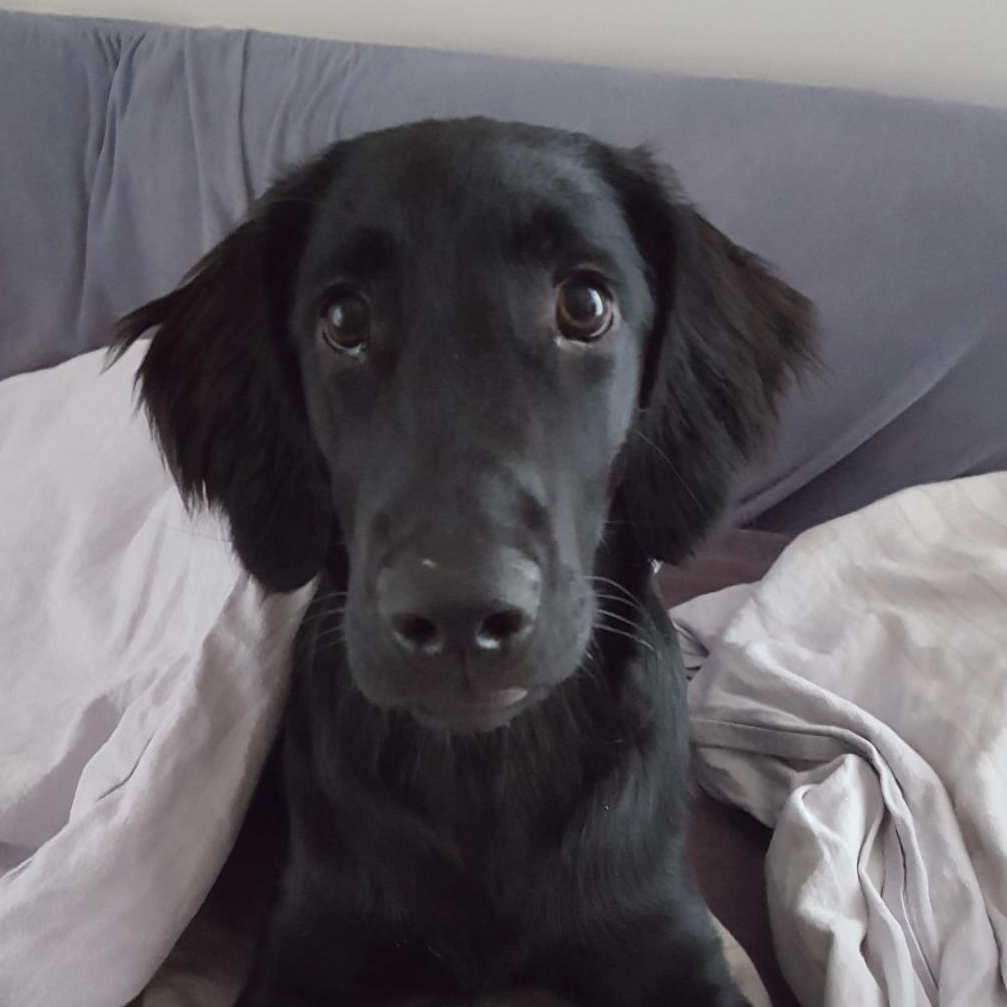

In [ ]:
from urllib.request import urlopen
from PIL import Image


resource  = urlopen("https://gitlab.kit.edu/nikolai.polley/Ml-Images/-/raw/main/classes.txt") # all 1000 classes from ImageNet
imagenet_classes =  resource.read().decode(resource.headers.get_content_charset()).split("\n")[:-1]
assert len(imagenet_classes) == 1000
img = Image.open(urlopen("https://gitlab.kit.edu/nikolai.polley/Ml-Images/-/raw/main/flat_coated1.png"))
img

In [ ]:
transform = timm.data.create_transform(**timm.data.resolve_data_config(model_official.pretrained_cfg))
#
#    Resize(size=224, interpolation=bicubic, max_size=None, antialias=warn)
#    CenterCrop(size=(224, 224))
#    ToTensor()
#    Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
#

# get some memory back, we don't need it anymore
del model_official

scaled_img = transform(img).unsqueeze(0) # add batch dimension

logits = my_transformer(scaled_img).detach() # get output for all classes

def prediction_given_logits(logits):
    probs = torch.nn.functional.softmax(logits, dim=-1) # calculate softmax for all classes

    # get the top 10 predictions
    top_probs, top_ixs = probs[0].topk(10)

    for i, (ix_, prob_) in enumerate(zip(top_ixs, top_probs)):
        ix = ix_.item()
        prob = prob_.item()
        cls = imagenet_classes[ix].strip().split(",")[0]
        print(f"{i}: {cls:<45} --- {prob:.4f}")

prediction_given_logits(logits)

0: flat-coated_retriever                         --- 0.9036
1: Labrador_retriever                            --- 0.0075
2: Gordon_setter                                 --- 0.0027
3: curly-coated_retriever                        --- 0.0019
4: quilt                                         --- 0.0017
5: golden_retriever                              --- 0.0016
6: Saluki                                        --- 0.0016
7: black-and-tan_coonhound                       --- 0.0009
8: English_setter                                --- 0.0008
9: tennis_ball                                   --- 0.0007


But what if a class does not exist in ImageNet?

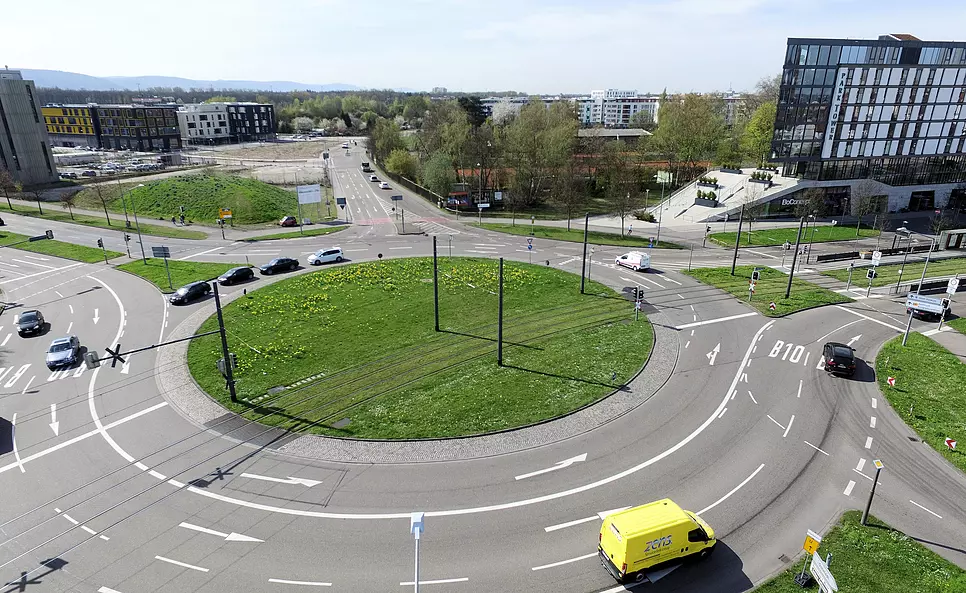

In [ ]:
img = Image.open(urlopen("https://www.ka-news.de/storage/image/2/4/2/9/1619242_ka-2022-644x395-966w_1A8_aF_iCBPHq.webp"))
img

In [ ]:
scaled_img = transform(img).unsqueeze(0) # add batch dimension
logits = my_transformer(scaled_img).detach() # get output for all classes
prediction_given_logits(logits)

0: ambulance                                     --- 0.1783
1: maze                                          --- 0.1515
2: tow_truck                                     --- 0.1013
3: police_van                                    --- 0.0647
4: cab                                           --- 0.0634
5: racer                                         --- 0.0614
6: trailer_truck                                 --- 0.0302
7: moving_van                                    --- 0.0245
8: pole                                          --- 0.0210
9: sundial                                       --- 0.0206


In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.8 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-7qvprs_t
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-7qvprs_t
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=71f68639dac1d9954c6a1a7869982c7fd07ce646b2c6ae940f65ade132185536
  Stored in directory: /tmp/pip-ephem-wheel-cache-c7r1z3j2/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


<div>
<img src="https://images.openai.com/blob/fbc4f633-9ad4-4dc2-bd94-0b6f1feee22f/overview-a.svg?width=10&height=10&quality=50" width="500"/>
</div>

<div>
<img src="https://images.openai.com/blob/d9d46e4b-6d6a-4f9e-9345-5c6538b1b8c3/overview-b.svg?width=10&height=10&quality=50" width="500"/>
</div>

In [ ]:
import clip

clip.available_models() # Different options for image encoders. Can't chose text encoder as it is a regular transformer-encoder model.

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
clip_model, preprocess = clip.load('ViT-B/32')
clip_model.cuda().eval()
vocab_size = clip_model.vocab_size

print("Text-encoder parameters:", f"{np.sum([int(np.prod(p.shape)) for p in clip_model.transformer.parameters()]):,}")
print("Image-encoder (ViT) parameters:", f"{np.sum([int(np.prod(p.shape)) for p in clip_model.visual.parameters()]):,}")
print("All parameters, including word/positional embeddings and final prediction head:", f"{np.sum([int(np.prod(p.shape)) for p in clip_model.parameters()]):,}")

print("Vocab size:", vocab_size)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
def predict_with_clip(text, image):
    # normalize images and append batch dimension
    t_img = preprocess(image).cuda().unsqueeze(0)

    # generate tokens from text
    text_tokens = clip.tokenize(text).cuda()

    with torch.no_grad():

        # feed image through vision encoder of clip and get one image representation vector
        image_feature = clip_model.encode_image(t_img).float()

        # feed image through Transformer-Encoder get for each text one text representation vector
        text_features = clip_model.encode_text(text_tokens).float()

        cos_sim = torch.nn.CosineSimilarity()
        # cosine similarity normalizes the features and
        # then calculates text_features @ image_features.T

        similarity = cos_sim(text_features.cpu(), image_feature.cpu())

        # clip uses a learned temperature scaling for calculating similarity
        scaled_similarity = similarity * clip_model.logit_scale.exp().cpu()

        softmaxed_similarity = scaled_similarity.softmax(dim=0)

    return softmaxed_similarity





text = ["A photo taken by a drone of a roundabout", "A picture of a traffic crossing", "A crude drawing of a roundabout", "A picture of a flat-coated retriever"]

clip_pred = predict_with_clip(text, img)

print("Similarity between text and image")
for i in range(len(text)):
    print(f"Text: \"{text[i]}\", has similarity with image: {clip_pred[i].item():.4f}")


Similarity between text and image
Text: "A photo taken by a drone of a roundabout", has similarity with image: 0.9970
Text: "A picture of a traffic crossing", has similarity with image: 0.0001
Text: "A crude drawing of a roundabout", has similarity with image: 0.0029
Text: "A picture of a flat-coated retriever", has similarity with image: 0.0000


Generally, Models that were trained self-supervised have a better understanding of images. Oftentimes this is advantageous, sometimes it produces funny results

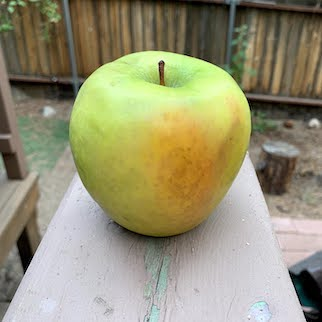

In [ ]:
apple_img = Image.open(urlopen("https://distill.pub/2021/multimodal-neurons/typographic/in-the-wild-2/apple-blank.jpg"))
apple_iPod_img = Image.open(urlopen("https://distill.pub/2021/multimodal-neurons/typographic/in-the-wild-2/apple-ipod.jpg"))

apple_iPod_img = Image.open(urlopen("https://distill.pub/2021/multimodal-neurons/typographic/in-the-wild-2/apple-ipod.jpg"))

apple_img


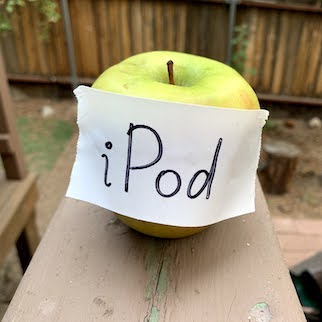

In [ ]:
apple_iPod_img

In [ ]:
### Predict with Vision Transformer trained on ImageNet
print("ViT for regular apple")
scaled_img = transform(apple_img).unsqueeze(0) # add batch dimension
logits = my_transformer(scaled_img).detach() # get output for all classes
prediction_given_logits(logits)


print("\n \n ViT for apple with sign")
scaled_img = transform(apple_iPod_img).unsqueeze(0) # add batch dimension
logits = my_transformer(scaled_img).detach() # get output for all classes
prediction_given_logits(logits)

ViT for regular apple
0: Granny_Smith                                  --- 0.8987
1: orange                                        --- 0.0013
2: lemon                                         --- 0.0012
3: banana                                        --- 0.0011
4: strawberry                                    --- 0.0008
5: fig                                           --- 0.0007
6: paintbrush                                    --- 0.0007
7: nail                                          --- 0.0007
8: plastic_bag                                   --- 0.0006
9: spindle                                       --- 0.0006

 
 ViT for apple with sign
0: Granny_Smith                                  --- 0.8760
1: banana                                        --- 0.0032
2: plastic_bag                                   --- 0.0020
3: lemon                                         --- 0.0019
4: orange                                        --- 0.0017
5: crate                                         -

In [ ]:
### Predict with Clip and using class names of imagenet as text
text = ["a photo of a green apple", "a photo of an iPod"]
#text = [img_class.split(",")[0] for img_class in imagenet_classes]
clip_pred = predict_with_clip(text, apple_img)

print("Similarity between text and original apple image")
for i in range(len(text)):
    print(f"Text: \"{text[i]}\", has similarity with image: {clip_pred[i].item():.4f}")


clip_pred = predict_with_clip(text, apple_iPod_img)

print("\n \n Similarity between text and apple image")
for i in range(len(text)):
    print(f"Text: \"{text[i]}\", has similarity with image: {clip_pred[i].item():.4f}")


Similarity between text and original apple image
Text: "a photo of a green apple", has similarity with image: 0.9980
Text: "a photo of an iPod", has similarity with image: 0.0020

 
 Similarity between text and apple image
Text: "a photo of a green apple", has similarity with image: 0.1924
Text: "a photo of an iPod", has similarity with image: 0.8076


In [ ]:
# let's make some space on memory
del clip_model

# How does the architecture change between Vision Transformer and language transformer?

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader
from torch.nn import functional as F
from urllib.request import urlopen
from tqdm import tqdm

class VisionAndLanguageTransformer(nn.Module):
    def __init__(
            self,
            context_size= 384,
            patch_size=16,
            n_classes=1000,
            embed_dim=768,
            depth=12,
            n_heads=12,
            is_ViT = True,
    ):
        super().__init__()

        self.is_ViT = is_ViT
        self.is_LM = not is_ViT


        if self.is_ViT:
            self.patch_embed = PatchEmbed(
                    patch_size=patch_size,
                    embed_dim=embed_dim,
            )

            # create a zeroth vector with the same size as the patch vectors
            # but with trainable values
            # initialize with zeros
            self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))

            # create positional embedding
            # start with zeros and learn what they should be
            n_patches = (context_size // patch_size)**2
            self.context_size = n_patches + 1 # each patch + one cls token

        if self.is_LM:
                # we predict each token, so that is our vocab size
                self.token_embed = nn.Embedding(n_classes, embed_dim)
                self.context_size = context_size

        self.pos_embed = nn.Parameter(
                torch.zeros(1, context_size, embed_dim)
        )

        # stack as many blocks as defined in input "depth"
        self.blocks = nn.ModuleList(
            [
                Block(
                    dim=embed_dim,
                    n_heads=n_heads,
                    is_decoder=self.is_LM,
                    context_size=context_size
                )
                for _ in range(depth)
            ]
        )

        # one final layer norm at the end of the transformer
        self.norm = nn.LayerNorm(embed_dim, eps=1e-6)

        # final fully connected layer that takes the first output vector
        # and predicts values for all classes
        self.head = nn.Linear(embed_dim, n_classes)


    def forward(self, x, targets=None):
        """Run the forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, in_chans, img_size, img_size)`.
        Returns
        -------
        logits : torch.Tensor
            Logits over all the classes - `(batchsize, n_classes)`.
        """
        batchsize = x.shape[0]

        # create patches from input image

        if self.is_ViT:
            x = self.patch_embed(x)

            # only necessary because we train with batches
            cls_token = self.cls_token.expand(
                    batchsize, -1, -1
            )  # (batchsize, 1, embed_dim)

            # put the the class token vector on the zeroth position
            x = torch.cat((cls_token, x), dim=1)  # (batchsize, 1 + n_patches, embed_dim)

        if self.is_LM:
            # (batchsize, n, embed_dim)
            x = self.token_embed(x)

        # add the positional encoding ontop of our input values

        number_tokens = x.shape[1]
        x = x + self.pos_embed[:,:number_tokens,:]  # (batchsize, 1 + n_patches, embed_dim)

        # feed input through all transformer blocks
        for block in self.blocks:
            x = block(x)

        # Final normalization of the output
        x = self.norm(x)

        if self.is_ViT:
            # take the vector that is on the zeroth position
            x = x[:, 0]
        else:
            # for generation we will take the last vector
            # but in pretraining we will use all vectors
            pass


        # feed it throuh a fully connected layer
        x = self.head(x)

        # labels are provided, identical to original input but shifted one token to the left
        if targets is not None:
            loss = F.cross_entropy(x.view(-1, x.size(-1)), targets.view(-1), ignore_index=-1)
            return x, loss

        return x

    def generate(self, prompt):
        while prompt.shape[1] < self.context_size:
            logits = self(prompt)
            # take vector furthest right
            logits = logits[:,-1,:] / 0.8   # scale softmax results with temperature 0.8
            # Top-K decoding take the 20 most likely predictions
            v, _ = torch.topk(logits, 20)

            # set prediction for all other logits to -inf
            logits[logits < v[:, [-1]]] = -float('Inf')

            probs = F.softmax(logits, dim=-1)

            # sample from distribution
            next_token = torch.multinomial(probs, num_samples=1)

            # append token to prompt

            prompt = torch.cat((prompt, next_token), dim=1)

        return prompt

## Generate dataset with text in Self Supervised Fashion

For this demo we will not use BPE but assign each letter/symbol of the text one token

In [ ]:
# We won't use BytePairEncoding (BPE) so we assign each symbol (mostly letters) one token

class TextDataset(Dataset):
    def __init__(self, english=True):
        # We can use the books of shakespeare for training
        # or books from german authors
        if english:
            resource_shakespeare  = urlopen("https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt")
            self.train_text =  resource_shakespeare.read().decode('utf-8')
            print(f"dataset has {len(self.train_text)} characters")
            print("random part of shakespeare \n",self.train_text[314825:315270])

        else:
            urls = [ # GÖTHE
                    "https://gutenberg.org/files/2229/2229-0.txt", # Faust 1
                    "https://www.gutenberg.org/cache/epub/2407/pg2407.txt", # Leiden des Werther
                    "https://www.gutenberg.org/cache/epub/2230/pg2230.txt",  # Faust 2
                    "https://www.gutenberg.org/cache/epub/2321/pg2321.txt", # Götz von Berlichingen
                    "https://www.gutenberg.org/cache/epub/10425/pg10425.txt", # Torquato Tasso
                    "https://www.gutenberg.org/cache/epub/2054/pg2054.txt", # Iphigenie auf Tauris
                    "https://www.gutenberg.org/cache/epub/8565/pg8565.txt", # Viele deutsche Gedichte inkl. Erlkönig
                    # Schiller
                    "https://www.gutenberg.org/cache/epub/47804/pg47804.txt", # Die Räuber
                    "https://www.gutenberg.org/cache/epub/6498/pg6498.txt", # Kabale und Liebe
                    "https://www.gutenberg.org/files/6518/6518-0.txt", # Wallensteins Lager
                    "https://www.gutenberg.org/cache/epub/6525/pg6525.txt", # Piccolomini
                    "https://www.gutenberg.org/cache/epub/6549/pg6549.txt", # Wallensteins Tod
                    ]
            self.train_text = ""


            for url in urls:
                book = urlopen(url)
                book = book.read().decode('utf-8')
                self.train_text += book

            print(f"dataset has {len(self.train_text)} characters \n")
            print("Part of our dataset: \n",self.train_text[16701:17073])

        letters = set(self.train_text)
        letters = sorted(letters)

        print("\n These symbols are represented as tokens ", letters)
        self.vocab_size = len(letters)
        print(f"\nThe text contains {self.vocab_size} characters which we will use as vocabulary")


        self.letter_to_token = {k: v for v, k in enumerate(list(letters))}
        self.token_to_letter = {v: k for v, k in enumerate(list(letters))}

    def text_to_tokens(self, text):

        tokens = []
        for i in text:
            tokens.append(self.letter_to_token[i])
        return torch.LongTensor(tokens)


    def __getitem__(self, idx):
        # We use a context length of 256 --> always return 256 tokens

        input = self.text_to_tokens(self.train_text[idx:idx+256])
        label = self.text_to_tokens(self.train_text[idx+1:idx+256+1])
        return input, label

    def __len__(self):
        return len(self.train_text) - 256 - 1



dataset = TextDataset(english=False)


kitgpt = VisionAndLanguageTransformer(context_size=256,
                                     n_classes=dataset.vocab_size,
                                     embed_dim = 384,
                                    is_ViT=False,
                                    depth=4).cuda()



dataloader = DataLoader(dataset, batch_size=256,
                        shuffle=True, num_workers=1)

dataset has 2541588 characters 

Part of our dataset: 
 
FAUST.
Habe nun, ach! Philosophie,
Juristerei und Medizin,
Und leider auch Theologie
Durchaus studiert, mit heißem Bemühn.
Da steh ich nun, ich armer Tor!
Und bin so klug als wie zuvor;
Heiße Magister, heiße Doktor gar
Und ziehe schon an die zehen Jahr
Herauf, herab und quer und krumm
Meine Schüler an der Nase herum—
Und sehe, daß wir nichts wissen können!

 These symbols are represented as tokens  ['\n', '\r', ' ', '!', '"', '#', '$', '%', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '}', '~', '\xa0', '«', '»', 'Ä', 'Ö', 'Ü', 'ß', 'à', 'ä', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'í', 

In [ ]:
def generate_text(text, model, dataset):
    def token_to_text(tokens):
        text = []
        for i in tokens[0]:
            text.append(dataset.token_to_letter[i.cpu().item()])
        return text
    with torch.no_grad():
        predicted_tokens = model.generate(dataset.text_to_tokens(text).unsqueeze(0).cuda())
        predicted_text = token_to_text(predicted_tokens)
    return "".join(predicted_text)

print("lets generate some text from our untrained-model")

text = "FAU"
generate_text(text, kitgpt, dataset)

lets generate some text from our untrained-model


'FAU•ä^í“Ö/*.“*0oEJ—0@h(l\rn4!X‘.SPw;~;JOç‹B4$»UKxs("4!x;ßJ(\r›‘Udæb.(*"9=væbægA‹ëÄ:äRS4äF.6›6Lr=\nLUeXÄh—éç"^~V%—»%SCcF/b,“n=Üß"s.17ApEÄweHUBä^y›\'Qæ}A›AWpüHU’räw1/Wi“2)gèlY2«è»@èmvMFzTB^ +3Bk:»@èVaAo$éß_:fhwk—æU•PXÄ“k*c0"4^ E5\rnxRMSPC“khçoYG"4‘‘‹OR0CX?o~eXNl8'

In [ ]:
class Trainer():
    def __init__(self, model, dataloader):

        # compile model to make training faster (PyTorch 2.0 functionality)
        compiled_model = torch.compile(model)
        compiled_model.train()
        optim = torch.optim.AdamW(compiled_model.parameters(), lr=5e-4)

        num_epochs = 5

        # train with mixed precision (float16 instead of float32)
        scaler = torch.cuda.amp.GradScaler()

        for epoch in range(num_epochs):
            pbar = tqdm(dataloader)
            for idx, (x,y) in enumerate(pbar):

                sliding_loss = 0

                with torch.autocast(device_type='cuda', dtype=torch.float16):
                    pred, loss = compiled_model(x.cuda(), y.cuda())

                scaler.scale(loss).backward()
                scaler.step(optim)
                scaler.update()
                compiled_model.zero_grad(set_to_none=True)

                sliding_loss += loss.detach().item()
                if idx % 50 == 0:
                    sliding_loss *=100 # just make the value larger
                    pbar.display(f'\n\n\nepoch: {epoch+1}, step: {idx}, loss {sliding_loss:.2f}\n'+ " Generated text: "+generate_text( "FAU", model, dataloader.dataset))
                    sliding_loss = 0
        torch.save({
            'epoch': epoch,
            'model_state_dict': compiled_model.state_dict(),
            'optimizer_state_dict': optim.state_dict(),
            'loss': loss,
            }, "goethe_GPT.pt")


Trainer(kitgpt, dataloader)

  0%|          | 0/9928 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



epoch: 1, step: 0, loss 485.40
  1%|          | 50/9928 [00:34<49:10,  3.35it/s]


epoch: 1, step: 50, loss 247.64
 Generated text: FAUST.
 Mond    TAundeie d   Gates      win Du d          ge       avon      ge  h       s      m     ss      n            ierzun   d    Döseihterenererd      derkend
  1%|          | 100/9928 [00:50<49:55,  3.28it/s]


epoch: 1, step: 100, loss 239.95
 Generated text: FAUnd dugeiher de aun
Un uch s   enn.
 Dun                Hürr   Derste                                        dichtzugehlerm    
           d |
  2%|▏         | 150/9928 [01:06<51:15,  3.18it/s]


epoch: 1, step: 150, loss 233.87
 Generated text: FAUNOPLE eiedit vorz hm
DETES ge Thrzlcheniebre beinden hrte kein gereir wi

BackendCompilerFailed: backend='inductor' raised:
BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

Set TORCH_LOGS="+dynamo" and TORCHDYNAMO_VERBOSE=1 for more information


You can suppress this exception and fall back to eager by setting:
    import torch._dynamo
    torch._dynamo.config.suppress_errors = True


### Load model trained with this code (5 epochs each ~19 min on A5000 with Mixed Precision and compiled model)


In [ ]:
loaded_model = VisionAndLanguageTransformer(context_size=256,
                                     n_classes=dataset.vocab_size,
                                     embed_dim = 384,
                                     is_ViT=False,
                                     depth=4).cuda()

lm = torch.compile(loaded_model)
# if manual load is working checkpoint = torch.load("goethe_GPT.pt")
checkpoint = torch.load("/content/drive/MyDrive/goethe_GPT.pt")
lm.load_state_dict(checkpoint['model_state_dict'])

lm.eval()

text = "FAU"
pred_text = generate_text(text, lm, dataset)
print(pred_text)

FAUST:
  Das übermaß der Schätze,
  Holdre Schale bricht!

  MEPHISTOPHELES:
  Erlaubet einen Tritt von meinem Fuß.

  BRAUNE:
  Nun, das geschieht wohlgeint;
  Daß er vielgelhaltisch im wissen,
  Werden wir beschränkten Fürsten haben,
  Und ihr
